In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


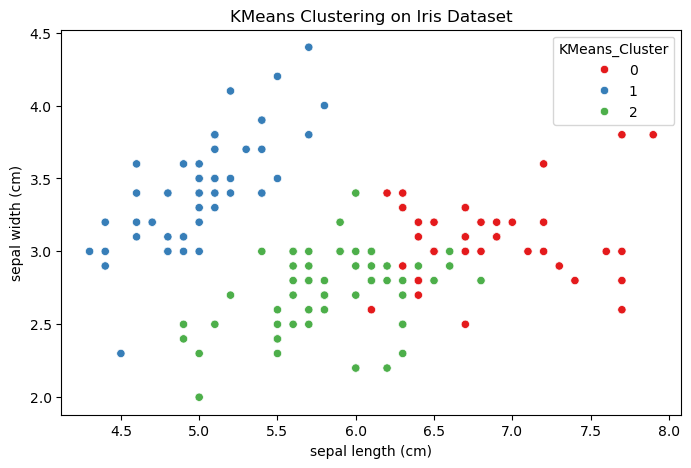

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(df)

# Visualize clusters using first two features
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='KMeans_Cluster', palette='Set1')
plt.title("KMeans Clustering on Iris Dataset")
plt.show()


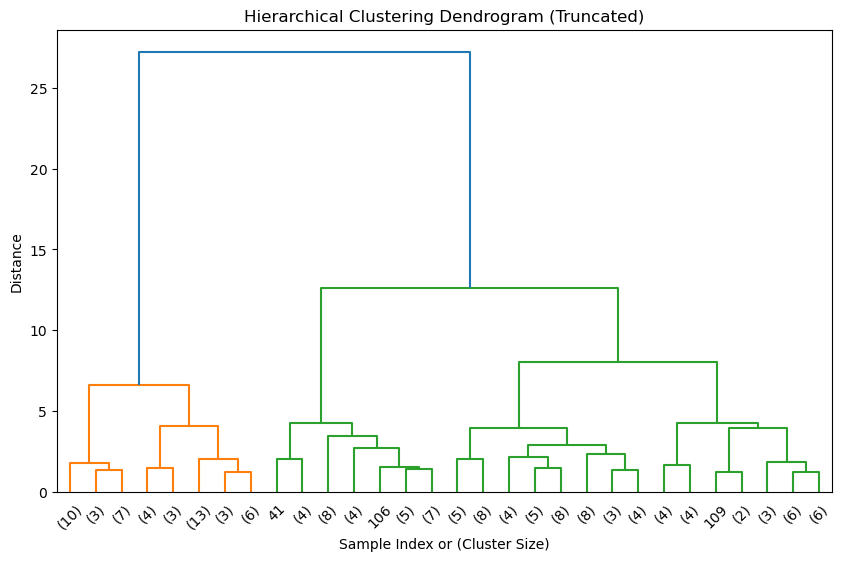

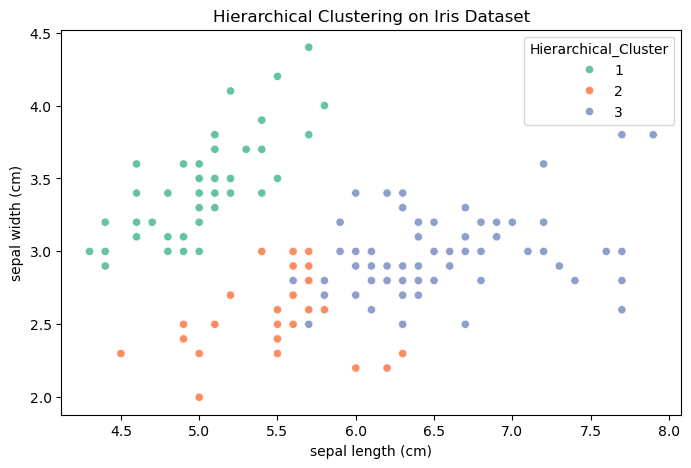

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

# Standardize the features for better clustering
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop('KMeans_Cluster', axis=1))

# Perform linkage
linked = linkage(scaled_df, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode='lastp', p=30)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.show()

# Assign clusters
df['Hierarchical_Cluster'] = fcluster(linked, 3, criterion='maxclust')

# Visualize Hierarchical clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='Hierarchical_Cluster', palette='Set2')
plt.title("Hierarchical Clustering on Iris Dataset")
plt.show()
